In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("LC_DATA.csv")

In [3]:
df

,Curr_Rating,Rank,Updated_Rating
0,1500.000,495.0,1702.515
1,1702.515,534.0,1817.966
2,1817.966,431.0,1903.009
3,1903.009,46.0,2048.161
4,2048.161,36.0,2169.692
...,...,...,...
3305,1461.130,8045.0,1469.970
3306,1500.000,19254.0,1412.395
3307,1412.395,20539.0,1353.585
3308,1353.585,16737.0,1304.653


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


df.dropna(inplace = True)
df.isna().sum()

Curr_Rating       0
Rank              0
Updated_Rating    0
dtype: int64

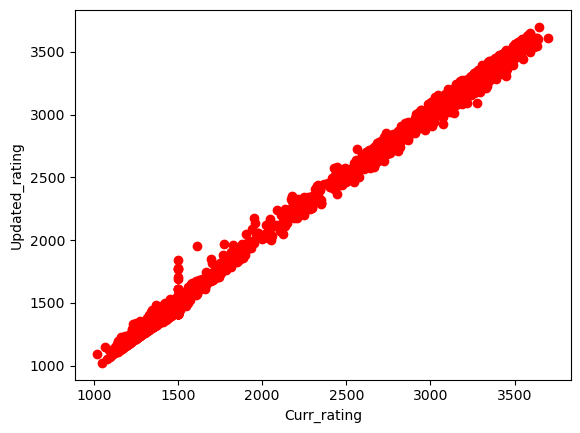

In [5]:
plt.xlabel('Curr_rating')
plt.ylabel('Updated_rating')
plt.scatter(df.Curr_Rating,df.Updated_Rating,color='red')

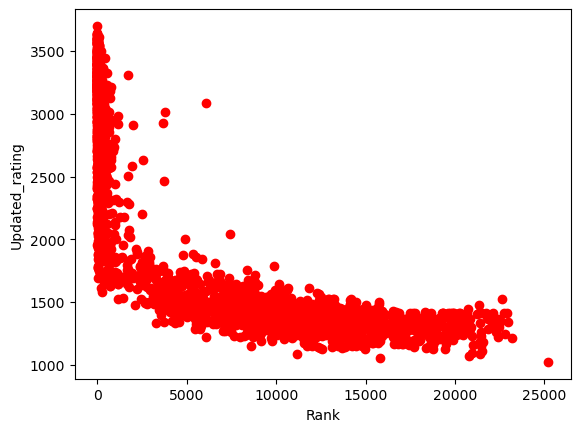

In [6]:
plt.xlabel('Rank')
plt.ylabel('Updated_rating')
plt.scatter(df.Rank,df.Updated_Rating,color='red')

In [7]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [8]:
lin = linear_model.LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.apply(pd.to_numeric).info()
x =df.drop('Updated_Rating',axis = 'columns')
y = df['Updated_Rating']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 0 to 3309
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Curr_Rating     3306 non-null   float64
 1   Rank            3306 non-null   float64
 2   Updated_Rating  3306 non-null   float64
dtypes: float64(3)
memory usage: 103.3 KB


In [11]:
x

,Curr_Rating,Rank
0,1500.000,495.0
1,1702.515,534.0
2,1817.966,431.0
3,1903.009,46.0
4,2048.161,36.0
...,...,...
3305,1461.130,8045.0
3306,1500.000,19254.0
3307,1412.395,20539.0
3308,1353.585,16737.0


In [12]:
y

0       1702.515
1       1817.966
2       1903.009
3       2048.161
4       2169.692
          ...   
3305    1469.970
3306    1412.395
3307    1353.585
3308    1304.653
3309    1282.163
Name: Updated_Rating, Length: 3306, dtype: float64

In [13]:
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha = 50 , max_iter = 1000)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 50 , max_iter = 1000)

In [14]:
linear.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

Ridge(alpha=50, max_iter=1000)

In [15]:
linear.score(x_test,y_test)

0.9982385327160679

In [16]:
lasso.score(x_test , y_test)

0.9982385560362579

In [17]:
ridge.score(x_test,y_test)

0.9982385327367479

In [18]:
from sklearn.model_selection import cross_val_score

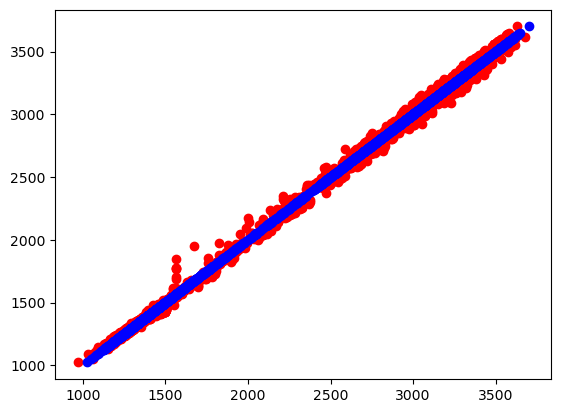

In [19]:
plt.scatter(linear.predict(x),y,color='red')
plt.scatter(y,y,color='blue')

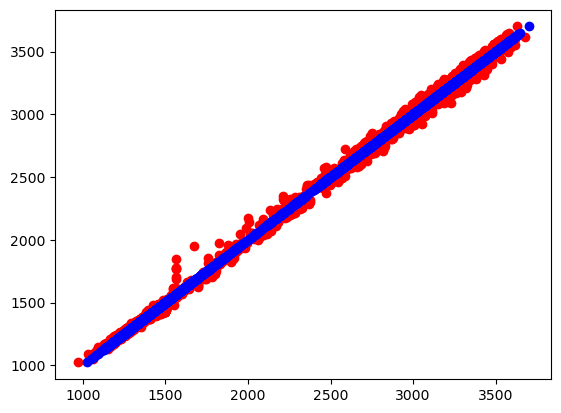

In [20]:
plt.scatter(lasso.predict(x),y,color='red')
plt.scatter(y,y,color='blue')

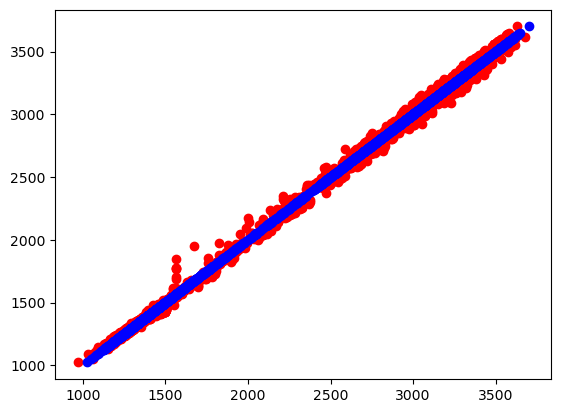

In [21]:
plt.scatter(ridge.predict(x),y,color='red')
plt.scatter(y,y,color='blue')

In [22]:
cross_val_score(linear,x,y,cv = 5)

array([0.97887904, 0.99352667, 0.99819608, 0.98468718, 0.9607866 ])

In [23]:
cross_val_score(lasso,x,y,cv = 5)

array([0.97887827, 0.99352579, 0.99819627, 0.98468889, 0.96078541])

In [24]:
cross_val_score(ridge,x,y,cv = 5)

array([0.97887904, 0.99352667, 0.99819608, 0.98468717, 0.96078661])

In [25]:
cross_val_score(linear,x_test,y_test, cv =5)

array([0.99828119, 0.99838291, 0.99774735, 0.99826562, 0.99843991])

In [26]:
import pickle

In [27]:
with open('lclinear','wb')as f:
    pickle.dump(linear,f)

In [28]:
with open('lcridge','wb')as f:
    pickle.dump(ridge,f)
with open('lclasso','wb')as f:
    pickle.dump(lasso,f)

In [29]:
with open('lcridge','rb')as f:
    dummy = pickle.load(f)

In [30]:
dummy.score(x,y)

0.998441069404811

In [32]:
from sklearn.linear_model import LinearRegression  
lin_regs= LinearRegression()  
lin_regs.fit(x,y)  

LinearRegression()

In [33]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  

LinearRegression()

In [34]:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[1500,495]]))  
print(poly_pred)  

[1591.9205634]


In [40]:
linear.predict([[1000,1]])

array([1084.04535233])

ModuleNotFoundError: No module named 'tensorflow'